In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import types
from astropy.io import ascii

# %matplotlib inline
%matplotlib notebook
import matplotlib.gridspec as gridspec
plt.rcParams['font.family']='serif'

In [2]:
##============
##Bringing in the template files
##============

data = ascii.read("templates/L0H_b.txt")
print(data)

     col1          col2             col3            col4           col5     
------------- -------------- ----------------- -------------- --------------
1.40018391609 0.892355265915               nan 0.892355265915 0.892355265915
 1.4044573307 0.878817421072               nan 0.878817421072 0.878817421072
1.40872728825 0.882026672742 4.68287364906e-05 0.876775520054 0.888916843464
1.41299378872 0.875194279855  0.00119214982097 0.862478469625 0.926166458791
 1.4172565937 0.868808149878 0.000231149564442 0.858672902239 0.888855212721
 1.4215157032 0.846031376395  4.7180942402e-07  0.84513413964 0.846499333891
  1.425770998 0.844939567895  6.0232010971e-05 0.840118317516 0.855621979472
1.43002235889 0.842112022561 2.44834436313e-05 0.839879241032  0.84902602687
1.43426966667 0.844867828893 4.77417622362e-05  0.83962267344 0.853417922954
1.43851292133 0.841670481979 1.92125485716e-05 0.836204283398 0.844377390632
          ...            ...               ...            ...            ...

In [3]:
##============
##Bringing in the fits files
##============

from astropy.io import fits
hdulist = fits.open('spectra/nir/U50068_Gl584C_20080508_BUR10A.fits')
spectrum = hdulist[0]
print(spectrum.data)

wavelength = spectrum.data[0]
flux = spectrum.data[1]

[[ 0.64203697  0.644306    0.646559   ...,  2.54534006  2.54825997
   2.55117989]
 [-0.75668001 -1.17075002  0.76268703 ...,  0.34597301  0.32822099
   0.212603  ]
 [ 0.41983801  0.40356401  0.419063   ...,  0.123714    0.166325    0.180867  ]]


In [4]:
##============
##Setting up the plot parameters and importing template files
##============

colors = ['#FF0000','#990000','#FF6699','#CC9900','#FFCC33', \
          '#66FF33','#009933','#99FFFF','#33CCFF','#0066FF']
colors.reverse() #this switches color order from blues --> reds
colors[0] = '#0000CC'

In [5]:
def typing_kit ( file_name ) :
    
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.io import fits
    from astropy.io import ascii

    hdulist = fits.open(file_name)
    spectrum = hdulist[0]
    wavelength = spectrum.data[0]
    flux = spectrum.data[1]
    
    fig1, axes1 = plt.subplots(9, 3, figsize=(6,11), sharey=True)

    #Create J, H and K bands for spectrum

    wavelength_J = []
    flux_J = []
    wavelength_H = []
    flux_H = []
    wavelength_K = []
    flux_K = []
    for jj in range(len(wavelength)):
        if wavelength[jj] >= 0.87 and wavelength[jj] <= 1.39:
            wavelength_J.append(wavelength[jj])
            flux_J.append(flux[jj])
        elif wavelength[jj] >= 1.41 and wavelength[jj] <= 1.89:
            wavelength_H.append(wavelength[jj])
            flux_H.append(flux[jj])
        elif wavelength[jj] >= 1.91 and wavelength[jj] <=2.39:
            wavelength_K.append(wavelength[jj])
            flux_K.append(flux[jj])


    #Normalize Each Band        

    wavelength_J = np.array(wavelength_J)
    flux_J = np.array(flux_J)
    wavelength_H = np.array(wavelength_H)
    flux_H = np.array(flux_H)
    wavelength_K = np.array(wavelength_K)
    flux_K = np.array(flux_K)

    flux_J = flux_J/np.mean(flux_J)
    flux_H = flux_H/np.mean(flux_H)
    flux_K = flux_K/np.mean(flux_K)


    #Create the plots

    for ii, color in zip(range(9), colors):
            ##J Band
            axes1[ii, 0].plot(ascii.read("templates/L{}J_f.txt".format(ii))['col1'], \
                              ascii.read("templates/L{}J_f.txt".format(ii))['col2'], c='red')
            axes1[ii, 0].fill_between(ascii.read("templates/L{}J_f.txt".format(ii))['col1'], \
                                      ascii.read("templates/L{}J_f.txt".format(ii))['col4'], \
                                      ascii.read("templates/L{}J_f.txt".format(ii))['col5'], color='#c6c6c6')
            axes1[ii, 0].plot(wavelength_J, flux_J, c='k')
            axes1[ii, 0].annotate('L{}'.format(ii), xy=(0.1, 0.9), xycoords='axes fraction', color=color)
            axes1[ii, 0].axis('off')

            #H Band
            axes1[ii, 1].plot(ascii.read("templates/L{}H_f.txt".format(ii))['col1'], \
                              ascii.read("templates/L{}H_f.txt".format(ii))['col2'], c='red') 
            axes1[ii, 1].fill_between(ascii.read("templates/L{}H_f.txt".format(ii))['col1'], \
                                      ascii.read("templates/L{}H_f.txt".format(ii))['col4'], \
                                      ascii.read("templates/L{}H_f.txt".format(ii))['col5'], color='#c6c6c6') 
            axes1[ii, 1].plot(wavelength_H, flux_H, c='k')
            axes1[ii, 1].axis('off')

            #K Band
            axes1[ii, 2].plot(ascii.read("templates/L{}K_f.txt".format(ii))['col1'], \
                              ascii.read("templates/L{}K_f.txt".format(ii))['col2'], c='red')
            axes1[ii, 2].fill_between(ascii.read("templates/L{}K_f.txt".format(ii))['col1'], \
                                      ascii.read("templates/L{}K_f.txt".format(ii))['col4'], \
                                      ascii.read("templates/L{}K_f.txt".format(ii))['col5'], color='#c6c6c6')
            axes1[ii, 2].plot(wavelength_K, flux_K, c='k')
            axes1[ii, 2].axis('off')


    fig1.tight_layout()

<IPython.core.display.Javascript object>


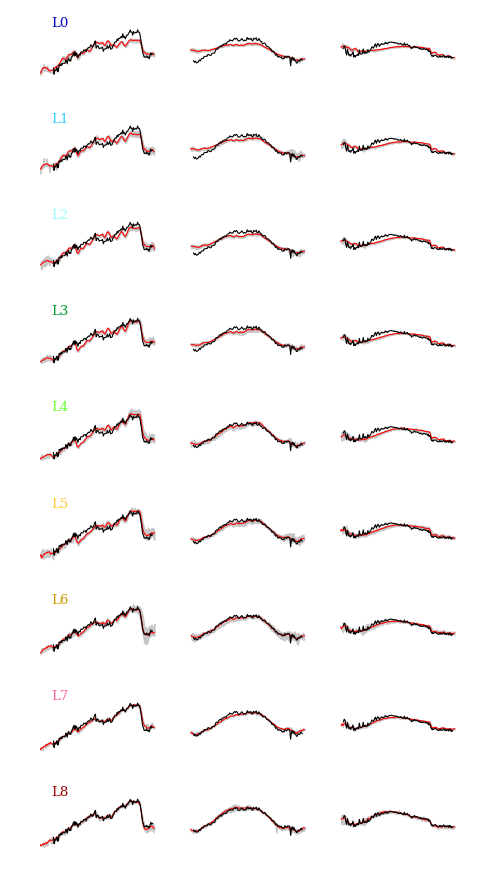

In [12]:
typing_kit('spectra/nir/U50068_Gl584C_20080508_BUR10A.fits')

In [82]:
def check_type(file_name, type_number) :
    
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from astropy.io import fits
    from astropy.io import ascii

    hdulist = fits.open(file_name)
    spectrum = hdulist[0]
    wavelength = spectrum.data[0]
    flux = spectrum.data[1]
    
    
    #Create J, H and K bands for spectrum

    wavelength_J = []
    flux_J = []
    wavelength_H = []
    flux_H = []
    wavelength_K = []
    flux_K = []
    for jj in range(len(wavelength)):
        if wavelength[jj] >= 0.87 and wavelength[jj] <= 1.39:
            wavelength_J.append(wavelength[jj])
            flux_J.append(flux[jj])
        elif wavelength[jj] >= 1.41 and wavelength[jj] <= 1.89:
            wavelength_H.append(wavelength[jj])
            flux_H.append(flux[jj])
        elif wavelength[jj] >= 1.91 and wavelength[jj] <=2.39:
            wavelength_K.append(wavelength[jj])
            flux_K.append(flux[jj])


    #Normalize Each Band        

    wavelength_J = np.array(wavelength_J)
    flux_J = np.array(flux_J)
    wavelength_H = np.array(wavelength_H)
    flux_H = np.array(flux_H)
    wavelength_K = np.array(wavelength_K)
    flux_K = np.array(flux_K)

    flux_J = flux_J/np.mean(flux_J)
    flux_H = flux_H/np.mean(flux_H)
    flux_K = flux_K/np.mean(flux_K)
    
    #Normalize the Overall Spectra to Kirkpatrick Normalization
    norm_flux_array=[]
    for jj in range(len(wavelength)):
        if wavelength[jj] >= 1.28 and wavelength[jj] <= 1.39:
            norm_flux_array.append(flux[jj])
    norm_flux_array=np.array(norm_flux_array)
    
    wavelength=np.array(wavelength)
    flux=np.array(flux)
    norm_flux=flux/np.mean(norm_flux_array)
    
    
    #List the standards, so they can be called # "spectra/nir/prism_0835+1953_20050123_CHI06A.fits", this  one doesn't exist?
    NIR_standards = ["spectra/nir/U20165_0345+2540_new_w.fits", "spectra/nir/spex_prism_2130-0845_080713.fits", \
                     "spectra/nir/U10244_0408-1450.fits", "spectra/nir/u11291_1506+1321_050323.fits", \
                     "spectra/nir/U12101_2158-1550_davy.fits", "spectra/nir/spex_prism_2137+0808_U20909.fits", \
                     "spectra/nir/U10880.fits", "spectra/nir/u10721_050323.fits", "spectra/nir/2M1632.fits"]
    
    #Create the Plots

    tPlot, axes2 = plt.subplots(
        nrows=3, ncols=4, sharex=False, sharey=False, 
        gridspec_kw={'width_ratios':[1,1,1,3]}
        )
                
    for jj, ii in zip([0,1,2], [type_number-1, type_number, type_number+1]):
            ##J Band
            axes2[jj, 0].plot(ascii.read("templates/L{}J_f.txt".format(ii))['col1'], \
                              ascii.read("templates/L{}J_f.txt".format(ii))['col2'], c='red')
            axes2[jj, 0].fill_between(ascii.read("templates/L{}J_f.txt".format(ii))['col1'], \
                                      ascii.read("templates/L{}J_f.txt".format(ii))['col4'], \
                                      ascii.read("templates/L{}J_f.txt".format(ii))['col5'], color='#c6c6c6')
            axes2[jj, 0].plot(wavelength_J, flux_J, c='k')
            axes2[jj, 0].annotate('L{}'.format(ii), xy=(0.1, 0.8), xycoords='axes fraction', color='k')
            axes2[jj, 0].set_ylim([-0.5, 2])
            axes2[jj, 0].axis('off')
            
            #H Band
            axes2[jj, 1].plot(ascii.read("templates/L{}H_f.txt".format(ii))['col1'], \
                              ascii.read("templates/L{}H_f.txt".format(ii))['col2'], c='red') 
            axes2[jj, 1].fill_between(ascii.read("templates/L{}H_f.txt".format(ii))['col1'], \
                                      ascii.read("templates/L{}H_f.txt".format(ii))['col4'], \
                                      ascii.read("templates/L{}H_f.txt".format(ii))['col5'], color='#c6c6c6') 
            axes2[jj, 1].plot(wavelength_H, flux_H, c='k')
            axes2[jj, 1].axis('off')


            #K Band
            axes2[jj, 2].plot(ascii.read("templates/L{}K_f.txt".format(ii))['col1'], \
                              ascii.read("templates/L{}K_f.txt".format(ii))['col2'], c='red')
            axes2[jj, 2].fill_between(ascii.read("templates/L{}K_f.txt".format(ii))['col1'], \
                                      ascii.read("templates/L{}K_f.txt".format(ii))['col4'], \
                                      ascii.read("templates/L{}K_f.txt".format(ii))['col5'], color='#c6c6c6')
            axes2[jj, 2].plot(wavelength_K, flux_K, c='k')
            axes2[jj, 2].axis('off')

            
            #All Together Now! This is where the Kirkpatrick 10 one comes in.
            temp_hdulist = fits.open(NIR_standards[ii])
            temp_spectrum = temp_hdulist[0]
            temp_wavelength = temp_spectrum.data[0]
            temp_flux = temp_spectrum.data[1]
                        
            temp_norm_flux_array=[]
            for kk in range(len(temp_wavelength)):
                if temp_wavelength[kk] >= 1.28 and temp_wavelength[kk] <= 1.39:
                    temp_norm_flux_array.append(temp_flux[kk])
            temp_norm_flux_array=np.array(temp_norm_flux_array)

            temp_wavelength=np.array(temp_wavelength)
            temp_flux=np.array(temp_flux)
            temp_norm_flux=temp_flux/np.mean(temp_norm_flux_array)
            
            
            axes2[jj, 3].plot(temp_wavelength, temp_norm_flux, c='red')
            axes2[jj, 3].plot(wavelength, norm_flux, c='k')
            axes2[jj, 3].set_ylim([0, max(norm_flux) + 0.25])
            axes2[jj, 3].set_xlim([min(wavelength), max(wavelength)])
            axes2[jj, 3].axis('off')            

<IPython.core.display.Javascript object>


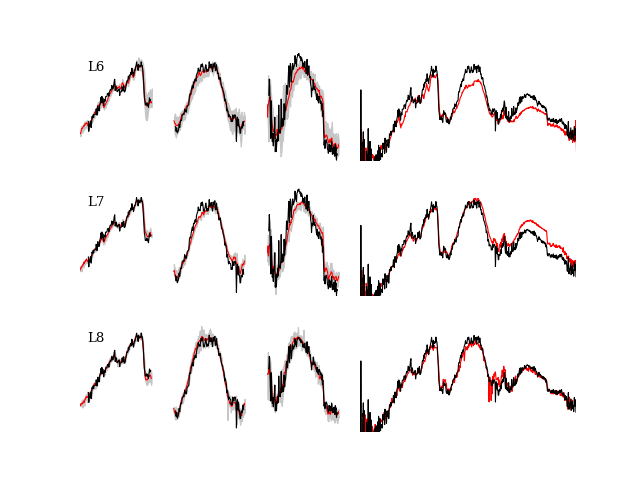

In [83]:
check_type('spectra/nir/U50068_Gl584C_20080508_BUR10A.fits', 7)